In [1]:
import os
# print(os.getcwd())
os.chdir("../")
# print(os.getcwd())

#### Append generation data to json file

In [2]:
import json
import csv
def get_json_files(folder_path):
    
    # List all JSON files in the folder
    json_files = [f for f in os.listdir(os.path.join(folder_path, 'archive')) if f.endswith('.json')]
    json_files = sorted(json_files, key=lambda p: int(p[:-5]))
    return json_files

def update_json_files(folder_path):
    # Print the list of JSON files
    json_files = get_json_files(folder_path)

    for file in json_files:
        id = file[:-5]
        json_file_path = os.path.join(folder_path, 'archive', file)
        # print(id)
        csv_file = os.path.join(folder_path, 'individual_logs', 'ID'+str(id).zfill(4)+".csv")
        assert os.path.exists(csv_file)
        # Read the last row of the CSV file
        with open(csv_file, mode='r') as csv_file:
            reader = csv.DictReader(csv_file)
            rows = list(reader)
            last_row = rows[-1]  # The last row from the CSV
            new_info = {"generation": last_row['generation']}
        
        with open(json_file_path, 'r+') as file:
            data = json.load(file)
            
            # Add new info
            data.update(new_info)
            
            # Write the updated data back to the file
            file.seek(0)
            json.dump(data, file, indent=4)
            file.truncate()

folder_path_random = 'runs_4090/log09-08_15-58_Random'
update_json_files(folder_path_random)  

In [141]:
import pandas as pd
import numpy as np
NGEN = 100

def get_cumulative_generations(folder_path):
    json_files = get_json_files(folder_path)
    generations = []
    for file in json_files:
        json_file_path = os.path.join(folder_path, 'archive', file)
        with open(json_file_path, 'r+') as file:
            data = json.load(file)
            generations.append(int(data['generation']))
            
    num_per_generations = [generations.count(i) for i in range(1, NGEN+1)]
    cumulative_generations = np.cumsum(num_per_generations)
    return cumulative_generations

In [142]:
cols = ['id','generation', "elapsed", "misbehaviour", 
                                  'expected_label', 'predicted_label' ,'text', 'gpt']
df_random = pd.DataFrame(columns=cols)

json_files = get_json_files(folder_path_random)
for i,file in enumerate(json_files):
    json_file_path = os.path.join(folder_path_random, 'archive', file)
    with open(json_file_path, 'r+') as file:
        data = json.load(file)
        for col in cols[:-1]:
            df_random.at[i, col] = data[col]

In [5]:
df_random

id generation             elapsed misbehaviour expected_label  \
0     1         29   7.839830160140991         True              0   
1     4         39  10.020275115966797         True              0   
2     8         51   12.38250184059143         True              0   
3    13         33   8.666420221328735         True              0   
4    14         26   7.208628177642822         True              0   
5    15         50   12.18946099281311         True              0   
6    21         12   4.135082483291626         True              0   
7    25          2   1.736741542816162         True              1   
8    26         61  14.238987445831299         True              0   
9    30          3   1.990316390991211         True              1   
10   31         38   9.688026428222656         True              0   
11   32         62  14.429301261901855         True              0   
12   33         12   4.130537748336792         True              0   
13   37         78  17.331032752990723         True              0   
14   42          3   1.985687017440796         True              1   
15   44         64  14.788858890533447         True              0   
16   52          6  2.7259442806243896         True              0   
17   59         16   5.017662286758423         True              0   
18   62         73  16.451775550842285         True              0   
19   66          5  2.4742751121520996         True              1   
20   70         27   7.398935794830322         True              0   
21   71         37   9.467207193374634         True              0   
22   84         64  14.773160696029663         True              0   
23   86         85   18.51089835166931         True              1   
24   87         19   5.671460390090942         True              0   
25   89         26   7.179004430770874         True              0   
26   91         65  15.042025089263916         True              1   
27   94         84  18.335519075393677         True              1   
28   98         85   18.50636124610901         True              0   
29  100         80  17.651481866836548         True              0   
30  102         20   5.883489608764648         True              0   
31  103         43  10.782035827636719         True              0   
32  107         20   5.881605863571167         True              0   
33  113         73  16.431715965270996         True              1   
34  115         27   7.381244421005249         True              0   
35  117         20   5.877729177474976         True              0   
36  118         93  19.862447500228882         True              0   
37  120          3  1.9548838138580322         True              0   
38  121          2  1.6988530158996582         True              0   
39  124         45  11.172300100326538         True              0   
40  125         16   4.991650581359863         True              1   
41  127         36   9.240914821624756         True              0   
42  132          6  2.6943790912628174         True              0   
43  135         11   3.855614423751831         True              0   
44  140         56  13.274231910705566         True              0   
45  147         57  13.455972909927368         True              1   
46  149          2   1.687997817993164         True              0   
47  152         47  11.549741268157959         True              0   
48  155          5  2.4393539428710938         True              0   
49  156          6  2.6852080821990967         True              0   
50  158          6   2.684457778930664         True              0   
51  160         95  20.180052042007446         True              1   
52  163         30   7.985069990158081         True              1   
53  168         56  13.263315916061401         True              0   
54  169         54  12.885260105133057         True              0   
55  170         47  11.542686223983765         True              0   

   predicted_l

In [6]:
df_random['text'][0]

"<start> i have to say is the only reason i even watched this film he is good however and nonetheless everything else nigh this film represent so former armed forces below average that it's not deserving the time and effort spent reckon this film br br this film has loads of technical aesthetic and artistic issues to wit shot selections framing camera movements within monologue sequences extremely bad editing probably due to the total and number lack of <unk> atomic and nuclear number 49 and between shots and overall terrible acting except for br br it was far too and as well and good theatrical atomic and nuclear number 49 acting and presentation to develop any sort of suspenseful moment in this film which is surprising because it's all about a bank robbery which should be at least and to the lowest degree somewhat and more beaver state less exciting atomic number 35 br and atomic number 35 how does a film this bad get made and so released and then distributed br atomic keep down 35 s

In [8]:
from openai import OpenAI
from config import API_KEY

client = OpenAI(
    # This is the default and can be omitted
    api_key=API_KEY#os.environ.get("OPENAI_API_KEY"),
)

"""
chat_completion = client.chat.completions.create(
    messages=[
        #{"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "如何在python使用chatgpt api？"},
    ],
    model="gpt-4o-mini" #"gpt-3.5-turbo"
)
"""



'\nchat_completion = client.chat.completions.create(\n    messages=[\n        #{"role": "system", "content": "You are a helpful assistant."},\n        {"role": "user", "content": "如何在python使用chatgpt api？"},\n    ],\n    model="gpt-4o-mini" #"gpt-3.5-turbo"\n)\n'

In [32]:
def get_gpt_answers(df, col_name = 'gpt'):
    for i in range(len(df)):
        
        chat_completion = client.chat.completions.create(
        messages=[
            #{"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", 
            "content": "Assume you are a sentiment classifier, given a text of movie review removing Stopwords and Punctuations. Please only reply 'positive',  'negative', or ' invalid' if the sentence does not make sense." + df['text'][i]},
        ],
        model="gpt-4o-mini" #"gpt-3.5-turbo"
        )

        df.at[i, col_name] = chat_completion.choices[0].message.content

In [10]:
get_gpt_answers(df_random)
# df_random = df_random.assign(preserved=lambda x: 1 if (x['expected_label'] == 1 and x['valid'] == "negative") else 0)
map = {'positive':1, 'negative':0, 'invalid': -1}
df_random['validity'] = df_random['gpt'].apply(lambda x: map.get(x))

In [24]:
df_random

id generation             elapsed misbehaviour expected_label  \
0     1         29   7.839830160140991         True              0   
1     4         39  10.020275115966797         True              0   
2     8         51   12.38250184059143         True              0   
3    13         33   8.666420221328735         True              0   
4    14         26   7.208628177642822         True              0   
5    15         50   12.18946099281311         True              0   
6    21         12   4.135082483291626         True              0   
7    25          2   1.736741542816162         True              1   
8    26         61  14.238987445831299         True              0   
9    30          3   1.990316390991211         True              1   
10   31         38   9.688026428222656         True              0   
11   32         62  14.429301261901855         True              0   
12   33         12   4.130537748336792         True              0   
13   37         78  17.331032752990723         True              0   
14   42          3   1.985687017440796         True              1   
15   44         64  14.788858890533447         True              0   
16   52          6  2.7259442806243896         True              0   
17   59         16   5.017662286758423         True              0   
18   62         73  16.451775550842285         True              0   
19   66          5  2.4742751121520996         True              1   
20   70         27   7.398935794830322         True              0   
21   71         37   9.467207193374634         True              0   
22   84         64  14.773160696029663         True              0   
23   86         85   18.51089835166931         True              1   
24   87         19   5.671460390090942         True              0   
25   89         26   7.179004430770874         True              0   
26   91         65  15.042025089263916         True              1   
27   94         84  18.335519075393677         True              1   
28   98         85   18.50636124610901         True              0   
29  100         80  17.651481866836548         True              0   
30  102         20   5.883489608764648         True              0   
31  103         43  10.782035827636719         True              0   
32  107         20   5.881605863571167         True              0   
33  113         73  16.431715965270996         True              1   
34  115         27   7.381244421005249         True              0   
35  117         20   5.877729177474976         True              0   
36  118         93  19.862447500228882         True              0   
37  120          3  1.9548838138580322         True              0   
38  121          2  1.6988530158996582         True              0   
39  124         45  11.172300100326538         True              0   
40  125         16   4.991650581359863         True              1   
41  127         36   9.240914821624756         True              0   
42  132          6  2.6943790912628174         True              0   
43  135         11   3.855614423751831         True              0   
44  140         56  13.274231910705566         True              0   
45  147         57  13.455972909927368         True              1   
46  149          2   1.687997817993164         True              0   
47  152         47  11.549741268157959         True              0   
48  155          5  2.4393539428710938         True              0   
49  156          6  2.6852080821990967         True              0   
50  158          6   2.684457778930664         True              0   
51  160         95  20.180052042007446         True              1   
52  163         30   7.985069990158081         True              1   
53  168         56  13.263315916061401         True              0   
54  169         54  12.885260105133057         True              0   
55  170         47  11.542686223983765         True              0   

   predicted_l

In [12]:
validity_rate = (df_random['validity']>=0).sum()/len(df_random)
preserving = (df_random['validity'] == df_random['expected_label'].astype('int')).sum()/len(df_random)
print(f"validity_rate {validity_rate} preserving rate {preserving}")

validity_rate 0.9285714285714286 preserving rate 0.8214285714285714


In [17]:
df_random.to_csv("csv_results/random_4090.csv", index=False)

## start another dataset

In [18]:

def collect_csv(folder_path, csv_name, col_name = 'gpt'):
    cols = ['id','generation', "elapsed", "misbehaviour", 
                                    'expected_label', 'predicted_label' ,'text', col_name]
    df = pd.DataFrame(columns=cols)
    
    update_json_files(folder_path)  

    json_files = get_json_files(folder_path)
    for i,file in enumerate(json_files):
        json_file_path = os.path.join(folder_path, 'archive', file)
        with open(json_file_path, 'r+') as file:
            data = json.load(file)
            for col in cols[:-1]:
                df.at[i, col] = data[col]

    get_gpt_answers(df)

    map = {'positive':1, 'negative':0, 'invalid': -1}
    df['validity'] = df[col_name].apply(lambda x: map.get(x))

    validity_rate = (df['validity']>=0).sum()/len(df)
    preserving = (df['validity'] == df['expected_label'].astype('int')).sum()/len(df)
    print(f"validity_rate {validity_rate} preserving rate {preserving}")
    df.to_csv("csv_results/" + csv_name, index=False)
    return df

folder_path_sg = 'runs_4090/log09-08_15-58_SmoothGrad'
csv_name = "smoothgrad_4090.csv"
df_sg = collect_csv(folder_path_sg, csv_name)

validity_rate 0.8947368421052632 preserving rate 0.7263157894736842


In [19]:
df_sg

id generation             elapsed misbehaviour expected_label  \
0     0         30  24.046083688735962         True              1   
1     1          7   7.511854887008667         True              0   
2     3         26  21.493003606796265         True              0   
3     4         37   28.26589059829712         True              0   
4     5          2  3.3375601768493652         True              1   
..  ...        ...                 ...          ...            ...   
90  166         21   17.93833065032959         True              0   
91  168          8   8.233582258224487         True              0   
92  170          5   5.836369276046753         True              0   
93  171         36  27.618907928466797         True              1   
94  173         67  44.401710510253906         True              0   

   predicted_label                                               text  \
0                0  <start> if you expect that this movie is full ...   
1                1  <start> i have to say is the only reason i eve...   
2                1  <start> first of all let me say that i am in n...   
3                1  <start> the movie had an interesting surprise ...   
4                0  <start> this without any doubt is the greatest...   
..             ...                                                ...   
90               1  it all go wrong well let's take an example fam...   
91               1  trip accordingly right or why go at all if you...   
92               1  <start> first off let me say i wasted hallowee...   
93               0  in the course of the film is revealed as the l...   
94               1  <start> i don't think it really matters too mu...   

         gpt  validity  
0   negative         0  
1   negative         0  
2   negative         0  
3   negative         0  
4   positive         1  
..       ...       ...  
90  negative         0  
91  negative         0  
92  negative         0  
93  negative         0  
94  negative         0  

[95 rows x 9 columns]

In [20]:
folder_path_ig = 'runs_4090/log09-08_16-02_IntegratedGradients'
csv_name = "integratedgradients_4090.csv"
df_ig = collect_csv(folder_path_ig, csv_name)

validity_rate 0.9548872180451128 preserving rate 0.8270676691729323


In [21]:
df_ig

id generation             elapsed misbehaviour expected_label  \
0      1          5  15.973446607589722         True              0   
1      3         28   64.03140759468079         True              0   
2      4         20  49.565613746643066         True              0   
3      5         14   37.11122798919678         True              1   
4      7          9  25.944966554641724         True              0   
..   ...        ...                 ...          ...            ...   
128  168         13   34.87821578979492         True              0   
129  169         43   83.68534517288208         True              0   
130  170         12   32.70061135292053         True              0   
131  172         22   53.40014314651489         True              0   
132  173         34   72.69307661056519         True              0   

    predicted_label                                               text  \
0                 1  <start> i have to say is the only reason i eve...   
1                 1  <start> first of all let me say that i am in n...   
2                 1  <start> the movie had an interesting surprise ...   
3                 0  <start> this without any doubt is the greatest...   
4                 1  <start> is probably the word i'd use to try an...   
..              ...                                                ...   
128               1  trip accordingly right or why go at all if you...   
129               1  <start> this is by sometime armed forces the s...   
130               1  <start> first off let me say i wasted hallowee...   
131               1  <start> can u believe a college professor made...   
132               1  <start> i don't think it really matters too mu...   

          gpt  validity  
0    negative         0  
1    negative         0  
2    negative         0  
3    positive         1  
4    negative         0  
..        ...       ...  
128  negative         0  
129  negative         0  
130  negative         0  
131  negative         0  
132  negative         0  

[133 rows x 9 columns]

In [22]:
folder_path_lime = 'runs_4090/log09-08_16-06_Lime'
csv_name = "lime_4090.csv"
df_lime = collect_csv(folder_path_lime, csv_name)

validity_rate 0.9242424242424242 preserving rate 0.7651515151515151


In [23]:
df_lime.validity

0      0
1      0
2      0
3      0
4      1
      ..
127    0
128    0
129    0
130    0
131    0
Name: validity, Length: 132, dtype: int64

In [38]:
folder_path_random = 'runs_server/runs/log09-04_18-02_Random'
csv_name = "random.csv"
df_lime = collect_csv(folder_path_random, csv_name)

validity_rate 0.9767441860465116 preserving rate 0.7674418604651163


In [143]:
def rerun_validity(df,  col_name = 'gpt2'):
    df[col_name] = None
    get_gpt_answers(df, col_name=col_name)

    map = {'positive':1, 'negative':0, 'invalid': -1}
    df['validity_'+col_name] = df[col_name].apply(lambda x: map.get(x))

    validity_rate = (df['validity_'+col_name]>=0).sum()/len(df)
    preserving = (df['validity_'+col_name] == df['expected_label'].astype('int')).sum()/len(df)
    print(f"validity_rate {validity_rate} preserving rate {preserving}")
    # df.to_csv("csv_results/" + csv_name, index=False)
    return df



In [33]:
df_random = rerun_validity(df_random,  col_name = 'gpt2')

validity_rate 0.9285714285714286 preserving rate 0.8214285714285714


In [35]:
df_random = rerun_validity(df_random,  col_name = 'gpt3')

validity_rate 0.9285714285714286 preserving rate 0.8571428571428571


In [37]:
df_random = rerun_validity(df_random,  col_name = 'gpt4')
df_random = rerun_validity(df_random,  col_name = 'gpt5')

validity_rate 0.8928571428571429 preserving rate 0.8392857142857143
validity_rate 0.9107142857142857 preserving rate 0.8571428571428571


In [38]:
df_random


id generation             elapsed misbehaviour expected_label  \
0     1         29   7.839830160140991         True              0   
1     4         39  10.020275115966797         True              0   
2     8         51   12.38250184059143         True              0   
3    13         33   8.666420221328735         True              0   
4    14         26   7.208628177642822         True              0   
5    15         50   12.18946099281311         True              0   
6    21         12   4.135082483291626         True              0   
7    25          2   1.736741542816162         True              1   
8    26         61  14.238987445831299         True              0   
9    30          3   1.990316390991211         True              1   
10   31         38   9.688026428222656         True              0   
11   32         62  14.429301261901855         True              0   
12   33         12   4.130537748336792         True              0   
13   37         78  17.331032752990723         True              0   
14   42          3   1.985687017440796         True              1   
15   44         64  14.788858890533447         True              0   
16   52          6  2.7259442806243896         True              0   
17   59         16   5.017662286758423         True              0   
18   62         73  16.451775550842285         True              0   
19   66          5  2.4742751121520996         True              1   
20   70         27   7.398935794830322         True              0   
21   71         37   9.467207193374634         True              0   
22   84         64  14.773160696029663         True              0   
23   86         85   18.51089835166931         True              1   
24   87         19   5.671460390090942         True              0   
25   89         26   7.179004430770874         True              0   
26   91         65  15.042025089263916         True              1   
27   94         84  18.335519075393677         True              1   
28   98         85   18.50636124610901         True              0   
29  100         80  17.651481866836548         True              0   
30  102         20   5.883489608764648         True              0   
31  103         43  10.782035827636719         True              0   
32  107         20   5.881605863571167         True              0   
33  113         73  16.431715965270996         True              1   
34  115         27   7.381244421005249         True              0   
35  117         20   5.877729177474976         True              0   
36  118         93  19.862447500228882         True              0   
37  120          3  1.9548838138580322         True              0   
38  121          2  1.6988530158996582         True              0   
39  124         45  11.172300100326538         True              0   
40  125         16   4.991650581359863         True              1   
41  127         36   9.240914821624756         True              0   
42  132          6  2.6943790912628174         True              0   
43  135         11   3.855614423751831         True              0   
44  140         56  13.274231910705566         True              0   
45  147         57  13.455972909927368         True              1   
46  149          2   1.687997817993164         True              0   
47  152         47  11.549741268157959         True              0   
48  155          5  2.4393539428710938         True              0   
49  156          6  2.6852080821990967         True              0   
50  158          6   2.684457778930664         True              0   
51  160         95  20.180052042007446         True              1   
52  163         30   7.985069990158081         True              1   
53  168         56  13.263315916061401         True              0   
54  169         54  12.885260105133057         True              0   
55  170         47  11.542686223983765         True              0   

   predicted_l

In [40]:
df_random.to_csv("csv_results/random_4090.csv", index=False)

In [144]:
df_ig = rerun_validity(df_ig,   col_name = 'gpt2')
df_ig = rerun_validity(df_ig,   col_name = 'gpt3')
df_ig = rerun_validity(df_ig,   col_name = 'gpt4')
df_ig = rerun_validity(df_ig,   col_name = 'gpt5')

NameError: name 'df_ig' is not defined

In [44]:
df_ig.to_csv("csv_results/integratedgradients_4090.csv", index=False) 


In [45]:
df_sg = rerun_validity(df_sg,   col_name = 'gpt2')
df_sg = rerun_validity(df_sg,   col_name = 'gpt3')
df_sg = rerun_validity(df_sg,   col_name = 'gpt4')
df_sg = rerun_validity(df_sg,   col_name = 'gpt5')

validity_rate 0.9157894736842105 preserving rate 0.7578947368421053
validity_rate 0.8736842105263158 preserving rate 0.7473684210526316
validity_rate 0.8526315789473684 preserving rate 0.7578947368421053
validity_rate 0.9052631578947369 preserving rate 0.7578947368421053


In [46]:
df_sg.to_csv("csv_results/smoothgrad_4090.csv", index=False) 


In [47]:
df_lime = rerun_validity(df_lime,   col_name = 'gpt2')
df_lime = rerun_validity(df_lime,   col_name = 'gpt3')
df_lime = rerun_validity(df_lime,   col_name = 'gpt4')
df_lime = rerun_validity(df_lime,   col_name = 'gpt5')

df_lime.to_csv("csv_results/lime_4090.csv", index=False) 

validity_rate 0.8939393939393939 preserving rate 0.7424242424242424
validity_rate 0.8939393939393939 preserving rate 0.7651515151515151
validity_rate 0.8863636363636364 preserving rate 0.7727272727272727
validity_rate 0.8863636363636364 preserving rate 0.7575757575757576


In [146]:
def validity_stats(df):
    col_names = ['validity','validity_gpt2','validity_gpt3','validity_gpt4','validity_gpt5']
    validity_rates = np.zeros(shape=5)
    preservation_rates = np.zeros(shape=5)
    
    for i, cn in enumerate(col_names):
        validity_rates[i] = (df[cn]>=0).sum()/len(df)
        preservation_rates[i] = (df[cn] == df['expected_label'].astype('int')).sum()/len(df)
    return validity_rates, preservation_rates

In [148]:
df_sg = pd.read_csv("csv_results/smoothgrad_4090.csv")
df_ig = pd.read_csv("csv_results/integratedgradients_4090.csv")
df_lime = pd.read_csv("csv_results/lime_4090.csv")
df_random = pd.read_csv("csv_results/random_4090.csv")


validity_means = []
validity_std = []
preservation_means = []
preservation_std = []
for df in [df_sg, df_ig, df_lime, df_random]:
    validity_rates, preservation_rates = validity_stats(df)
    validity_means.append(validity_rates.mean())
    validity_std.append(validity_rates.std())
    preservation_means.append(preservation_rates.mean())
    preservation_std.append(preservation_rates.std())


In [149]:
print(validity_means)

[0.8884210526315789, 0.9263157894736842, 0.8969696969696969, 0.9178571428571429]


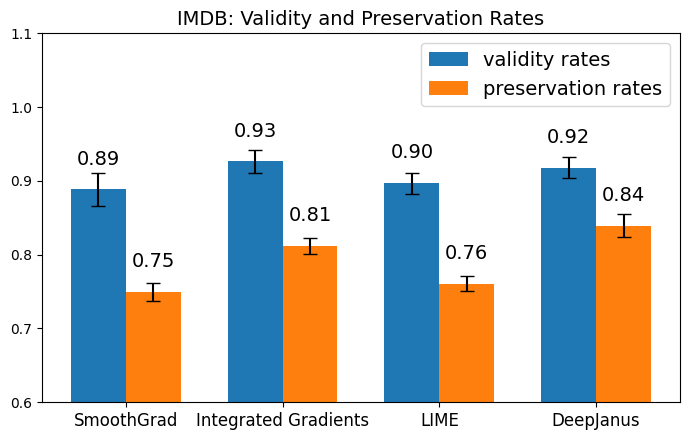

In [152]:
import numpy as np
import matplotlib.pyplot as plt


methods = ['SmoothGrad', 'Integrated Gradients', 'LIME', 'DeepJanus']

x = np.arange(len(methods)) 
width = 0.35  # bar width



fig, ax = plt.subplots(figsize=(7, 4.5))


rects1 = ax.bar(x - width/2, validity_means, width, yerr=validity_std, label='validity rates', capsize=5)
rects2 = ax.bar(x + width/2, preservation_means, width, yerr=preservation_std, label='preservation rates', capsize=5)


# ax.set_ylabel('Scores')
ax.set_title('IMDB: Validity and Preservation Rates', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(methods, fontsize=12)
ax.legend(fontsize=14)
ax.set_ylim([0.6,1.1])

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 15),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=14)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

#plt.show()
plt.savefig("figures/validity_imdb.svg", format='svg')

In [61]:
validity_sums = []
preservation_sums = []

for df in [df_sg, df_ig, df_lime, df_random]:
    validity_rates, preservation_rates = validity_stats(df)
    validity_sums.append(validity_rates)
    preservation_sums.append(preservation_rates)

In [62]:
validity_sums

[array([0.89473684, 0.91578947, 0.87368421, 0.85263158, 0.90526316]),
 array([0.95488722, 0.91729323, 0.90977444, 0.93233083, 0.91729323]),
 array([0.92424242, 0.89393939, 0.89393939, 0.88636364, 0.88636364]),
 array([0.92857143, 0.92857143, 0.92857143, 0.89285714, 0.91071429])]

[array([0.89473684, 0.91578947, 0.87368421, 0.85263158, 0.90526316]), array([0.95488722, 0.91729323, 0.90977444, 0.93233083, 0.91729323]), array([0.92424242, 0.89393939, 0.89393939, 0.88636364, 0.88636364]), array([0.92857143, 0.92857143, 0.92857143, 0.89285714, 0.91071429]), array([0.72631579, 0.75789474, 0.74736842, 0.75789474, 0.75789474]), array([0.82706767, 0.79699248, 0.80451128, 0.81954887, 0.81203008]), array([0.76515152, 0.74242424, 0.76515152, 0.77272727, 0.75757576]), array([0.82142857, 0.82142857, 0.85714286, 0.83928571, 0.85714286])]


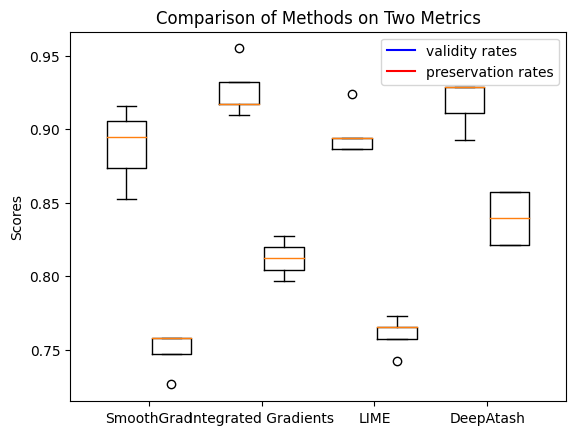

In [63]:
import numpy as np
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

all_data = [validity_sums[i] for i in range(4)] + [preservation_sums[i] for i in range(4)]
print(all_data)

positions = np.concatenate([np.arange(4) - 0.2, np.arange(4) + 0.2])

ax.boxplot(all_data, positions=positions, widths=0.35)

ax.set_xticks(np.arange(4))
ax.set_xticklabels(methods)

ax.set_ylabel('Scores')
ax.set_title('Comparison of Methods on Two Metrics')

ax.plot([], c='b', label='validity rates') 
ax.plot([], c='r', label='preservation rates')  
ax.legend()

plt.show()


In [3]:
folder_path_ig = 'runs_4090/log09-08_16-02_IntegratedGradients'
folder_path_random = 'runs_4090/log09-08_15-58_Random'
folder_path_sg = 'runs_4090/log09-08_15-58_SmoothGrad'
folder_path_lime = 'runs_4090/log09-08_16-06_Lime'

## Time

In [139]:
folder_list = [folder_path_random, folder_path_sg, folder_path_ig, folder_path_lime]
folder_name = ['random', 'smoothgrad', 'ig', 'lime']

for folder_path, name in zip(folder_list, folder_name):
    jsonfiles = get_json_files(folder_path)
    elasped_time = []
    generations = []
    for jf in jsonfiles:
        json_file_path = os.path.join(folder_path, 'archive', jf)
        
        with open(json_file_path, 'r+') as file:
            data = json.load(file)
            elasped_time.append(float(data['elapsed']))
            generations.append(int(data['generation']))
            # Add new info
    generations = np.array(sorted(generations))
    top_number = 40
    top_iter = 90
    generations_cut = generations[:top_number]
    #generations = generations -1
    #print(generations)
    elasped_time = np.array(sorted(elasped_time))
    elasped_time_cut = elasped_time[:top_number]
    #print(elasped_time)
    whole_iterations = generations.sum() + (174-len(generations))*(generations.max())
    
    print(name, len(generations), (np.array(elasped_time).max())/whole_iterations)#,  np.array(elasped_time).max()/whole_iterations* generations.std())
    print("same pop",name, (np.array(elasped_time_cut).max())/len(generations_cut))
    print((np.array(elasped_time_cut).max()/len(generations_cut) -0.332 )/ 0.332)
    print("whole pop",name, (np.array(elasped_time).max())/len(generations))
    offset = 5
    print("per iter same iter",name, (elasped_time[generations<= top_iter].max()+offset)/top_iter/173*1000)
    print("per iter same pop",name, (elasped_time_cut.max()+offset)/generations_cut.max()/173*1000)
    # print(((elasped_time[generations<= top_iter].max()+offset)/top_iter/173*1000 - 1.51)/1.51)


random 56 0.0015149051904517264
same pop random 0.33158289790153506
-0.0012563316218824124
whole pop random 0.3603580721787044
per iter same iter random 1.5100127393493457
per iter same pop random 1.88514821594358
smoothgrad 95 0.005532886625791423
same pop smoothgrad 0.44886988401412964
0.35201772293412537
whole pop smoothgrad 0.6011626921202007
per iter same iter smoothgrad 3.873348037019018
per iter same pop smoothgrad 6.318413256417612
ig 133 0.016973905286101505
same pop ig 0.8186553955078125
1.4658295045416039
whole pop ig 0.9613866806030273
per iter same iter ig 8.298483228714097
per iter same pop ig 18.18218488454359
lime 132 1.4426471454994838
same pop lime 78.89339024424552
236.63069350676363
whole pop lime 90.62447068546757
per iter same iter lime 734.6057875001744
per iter same pop lime 1305.0105738108261


In [92]:
generations<= 10

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [58]:
0.3603580721787044/95*100

0.3793242865038994

In [18]:
os.path.getctime('runs_4090/log09-08_15-58_SmoothGrad/stats.csv') 

1725818338.9847429

In [19]:
os.path.getmtime('runs_4090/log09-08_15-58_SmoothGrad/stats.csv') 

1725818338.9847429

## Stat test

In [69]:
from data_analysis.stat_tests import *
folder_path_ig = 'runs_4090/log09-08_16-02_IntegratedGradients'
folder_path_random = 'runs_4090/log09-08_15-58_Random'
folder_path_sg = 'runs_4090/log09-08_15-58_SmoothGrad'
folder_path_lime = 'runs_4090/log09-08_16-06_Lime'

folder_list = [folder_path_random, folder_path_sg, folder_path_ig, folder_path_lime]
folder_name = ['random', 'smoothgrad', 'ig', 'lime']
generations = [dict(), dict(), dict(), dict()]
for i, (folder_path, name) in enumerate(zip(folder_list, folder_name)):
    jsonfiles = get_json_files(folder_path)
    
    for jf in jsonfiles:
        json_file_path = os.path.join(folder_path, 'archive', jf)
        
        with open(json_file_path, 'r+') as file:
            data = json.load(file)
            generations[i].update({int(data['id']):int(data['generation'])})
            # Add new info
print(generations[0])
print(generations[1])
print(generations[2])
print(generations[3])



{1: 29, 4: 39, 8: 51, 13: 33, 14: 26, 15: 50, 21: 12, 25: 2, 26: 61, 30: 3, 31: 38, 32: 62, 33: 12, 37: 78, 42: 3, 44: 64, 52: 6, 59: 16, 62: 73, 66: 5, 70: 27, 71: 37, 84: 64, 86: 85, 87: 19, 89: 26, 91: 65, 94: 84, 98: 85, 100: 80, 102: 20, 103: 43, 107: 20, 113: 73, 115: 27, 117: 20, 118: 93, 120: 3, 121: 2, 124: 45, 125: 16, 127: 36, 132: 6, 135: 11, 140: 56, 147: 57, 149: 2, 152: 47, 155: 5, 156: 6, 158: 6, 160: 95, 163: 30, 168: 56, 169: 54, 170: 47}
{0: 30, 1: 7, 3: 26, 4: 37, 5: 2, 7: 30, 8: 56, 9: 30, 11: 25, 14: 36, 15: 28, 21: 13, 22: 4, 23: 21, 25: 2, 29: 35, 30: 6, 31: 23, 32: 5, 33: 7, 38: 87, 39: 27, 40: 34, 41: 47, 42: 2, 44: 25, 45: 23, 47: 22, 49: 83, 50: 14, 52: 2, 53: 13, 54: 56, 57: 87, 59: 3, 61: 49, 62: 15, 65: 51, 66: 3, 67: 35, 70: 23, 71: 84, 76: 55, 77: 14, 78: 30, 80: 17, 84: 9, 86: 5, 87: 11, 88: 5, 91: 8, 97: 89, 98: 57, 100: 94, 102: 28, 105: 60, 108: 9, 110: 49, 112: 54, 113: 62, 115: 41, 117: 4, 118: 41, 120: 9, 121: 2, 123: 16, 124: 21, 125: 6, 127: 30

In [2]:
import pandas as pd
pd_r = pd.DataFrame(generations[0].items(), columns=['id', 'mutation_number'])
pd_s = pd.DataFrame(generations[1].items(), columns=['id', 'mutation_number'])
pd_i = pd.DataFrame(generations[2].items(), columns=['id', 'mutation_number'])
pd_l = pd.DataFrame(generations[3].items(), columns=['id', 'mutation_number'])

test_name = ['smoothgrad', 'ig', 'lime']
pds = [pd_s,pd_i,pd_l]
for df, name in zip(pds, test_name):
    df_merge = pd.merge(pd_r, df, on="id")

    pvalue, cohensd = run_wilcoxon_and_cohend(df_merge["mutation_number_x"], df_merge["mutation_number_y"])
    print(name, pvalue, cohensd[0])

NameError: name 'generations' is not defined

In [3]:
csv_adas = "../XMutant-LK-ADS/results/csvs/cumulative_failure.csv"
os.path.exists(csv_adas)
df_adas = pd.read_csv(csv_adas)
df_adas_columns =  [ 
    'XAI random SM', 'XAI attention_opposite SM', 'XAI attention_same SM',# 'RANDOM random',
    'XAI random GC',   'XAI attention_opposite GC', 'XAI attention_same GC', 
    'XAI random IG', 'XAI attention_opposite IG', 'XAI attention_same IG'
       ]
for col_name in df_adas_columns:
    pvalue, cohensd = run_wilcoxon_and_cohend(df_adas[col_name], df_adas["RANDOM random"])
    print("---------------------------------------",col_name, "{:.2E}".format(pvalue), cohensd[0])
csv_adas = "../XMutant-LK-ADS/results/csvs/cumulative_failure.csv"
os.path.exists(csv_adas)
df_adas = pd.read_csv(csv_adas)
df_adas_columns =  [ 
    'XAI random SM', 'XAI attention_opposite SM', 'XAI attention_same SM',# 'RANDOM random',
    'XAI random GC',   'XAI attention_opposite GC', 'XAI attention_same GC', 
    'XAI random IG', 'XAI attention_opposite IG', 'XAI attention_same IG'
       ]
for col_name in df_adas_columns:
    pvalue, cohensd = run_wilcoxon_and_cohend(df_adas[col_name], df_adas["RANDOM random"])
    print("---------------------------------------",col_name, "{:.2E}".format(pvalue), cohensd[0])


NameError: name 'run_wilcoxon_and_cohend' is not defined

In [120]:
csv_mnist = "../XMutant-MNIST/result/csv_folder/cumulative_misclassified_all.csv"
assert os.path.exists(csv_mnist)
df_mnist = pd.read_csv(csv_mnist)
df_mnist.columns
df_mnist_columns =  ['C_C_sm','C_R_sm','S_R_sm', 
                      'C_C_GC', 'C_R_GC','S_R_GC',
                      'C_C_IG',  'C_R_IG',  'S_R_IG']
for col_name in df_mnist_columns:
    pvalue, cohensd = run_wilcoxon_and_cohend(df_mnist[col_name], df_mnist['R_R'])
    print("---------------------------------------",col_name, "{:.2E}".format(pvalue), cohensd[0])


statistic is: 7.0 P-Value is: 4.939740152709137e-165
Cohen's D is: ('large', 1.8981425556568468)
--------------------------------------- C_C_sm 4.94E-165 large
statistic is: 24.5 P-Value is: 1.09241807231959e-164
Cohen's D is: ('small', 0.40338393559431085)
--------------------------------------- C_R_sm 1.09E-164 small
statistic is: 21.5 P-Value is: 3.455660345094654e-165
Cohen's D is: ('small', 0.3497526603783546)
--------------------------------------- S_R_sm 3.46E-165 small
statistic is: 55.5 P-Value is: 2.5677220619074244e-164
Cohen's D is: ('large', 1.7716855537412124)
--------------------------------------- C_C_GC 2.57E-164 large
statistic is: 1722.5 P-Value is: 1.1907494441206135e-161
Cohen's D is: ('small', 0.3199379038123529)
--------------------------------------- C_R_GC 1.19E-161 small
statistic is: 126.0 P-Value is: 2.104378741536139e-164
Cohen's D is: ('small', 0.35434697286545713)
--------------------------------------- S_R_GC 2.10E-164 small
statistic is: 2.0 P-Value is:

In [118]:
df_adas_columns =  [ 
    'XAI random SM', 'XAI attention_opposite SM', 'XAI attention_same SM',# 'RANDOM random',
    'XAI random GC',   'XAI attention_opposite GC', 'XAI attention_same GC', 
    'XAI random IG', 'XAI attention_opposite IG', 'XAI attention_same IG'
       ]
for col_name in df_adas_columns:
    pvalue, cohensd = run_wilcoxon_and_cohend(df_adas[col_name], df_adas["RANDOM random"])
    print("---------------------------------------",col_name, "{:.2E}".format(pvalue), cohensd[0])


KeyError: 'XAI random SM'